# Bootstraping 

In [1]:
library(boot)
setwd("C:/Users/jeffr/OneDrive/Escritorio")

In [2]:
# Cargar los datos
data <- read.csv("penn_jae.csv")

In [3]:
# Filtrar los datos
data <- subset(data, tg == 4 | tg == 0)
data

,X,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
1,1,10824,0,18,18,0,0,0,0,2,...,1,0,0,0,0,0,0,0,1,0
4,4,10824,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,5,10747,0,27,27,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,12,10607,4,9,9,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
13,13,10831,0,27,27,0,0,0,0,1,...,1,0,0,0,1,1,0,1,0,0
14,14,10845,0,27,27,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
15,15,10831,0,9,9,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
17,17,10859,0,27,27,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
23,23,10516,0,15,15,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25,25,10663,0,28,11,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [4]:
# Fórmula del modelo
formula <- log(inuidur1) ~ tg + female + black + othrace + factor(dep) + 
           q2 + q3 + q4 + q5 + q6 + agelt35 + agegt54 + durable + lusd + husd

In [5]:
# Definir función para obtener los coeficientes del modelo
boot_fn <- function(data, index) {
  fit <- lm(formula, data = data[index, ])
  return(coef(fit))
}

In [6]:
# Aplicar bootstrap
set.seed(123)
results <- boot(data, boot_fn, R = 1000)

In [7]:
# Obtener errores estándar para las variables tg, female y black
coef_names <- names(coef(lm(formula, data = data)))
colnames(results$t) <- coef_names

tg_se <- sd(results$t[, "tg"])
female_se <- sd(results$t[, "female"])
black_se <- sd(results$t[, "black"])

In [8]:
# Crear una tabla de resultados
results_table <- data.frame(
  Variable = c("tg", "female", "black"),
  Standard_Error = c(tg_se, female_se, black_se)
)

results_table

Variable,Standard_Error
tg,0.008885217
female,0.034558548
black,0.059231111


# Causal Forest

In [1]:
#install.packages("grf")
#install.packages("Hmisc")

### 1. How the tree was built?

In [2]:
set.seed(1)

rm(list = ls())

library(grf)
if(packageVersion("grf") < '0.10.2') {
  warning("This script requires grf 0.10.2 or higher")
}
library(sandwich)
library(lmtest)
library(Hmisc)
library(ggplot2)

data.all = read.csv("synthetic_data.csv")
data.all$schoolid = factor(data.all$schoolid)

DF = data.all[,-1]
school.id = as.numeric(data.all$schoolid)

school.mat = model.matrix(~ schoolid + 0, data = data.all)
school.size = colSums(school.mat)

# It appears that school ID does not affect pscore. So ignore it
# in modeling, and just treat it as source of per-cluster error.
w.lm = glm(Z ~ ., data = data.all[,-3], family = binomial)
summary(w.lm)

W = DF$Z
Y = DF$Y
X.raw = DF[,-(1:2)]

C1.exp = model.matrix(~ factor(X.raw$C1) + 0)
XC.exp = model.matrix(~ factor(X.raw$XC) + 0)

X = cbind(X.raw[,-which(names(X.raw) %in% c("C1", "XC"))], C1.exp, XC.exp)

#
# Grow a forest. Add extra trees for the causal forest.
#

Y.forest = regression_forest(X, Y, clusters = school.id, equalize.cluster.weights = TRUE)
Y.hat = predict(Y.forest)$predictions
W.forest = regression_forest(X, W, clusters = school.id, equalize.cluster.weights = TRUE)
W.hat = predict(W.forest)$predictions

cf.raw = causal_forest(X, Y, W,
                       Y.hat = Y.hat, W.hat = W.hat,
                       clusters = school.id,
                       equalize.cluster.weights = TRUE)
varimp = variable_importance(cf.raw)
selected.idx = which(varimp > mean(varimp))

cf = causal_forest(X[,selected.idx], Y, W,
                   Y.hat = Y.hat, W.hat = W.hat,
                   clusters = school.id,
                   equalize.cluster.weights = TRUE,
                   tune.parameters = "all")
tau.hat = predict(cf)$predictions
print(colnames(X)[selected.idx])


Cargando paquete requerido: zoo


Adjuntando el paquete: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Adjuntando el paquete: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units





Call:
glm(formula = Z ~ ., family = binomial, data = data.all[, -3])

Coefficients: (6 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.9524636  0.2845173  -3.348 0.000815 ***
schoolid2    0.0697302  0.2766287   0.252 0.800986    
schoolid3    0.0382080  0.2911323   0.131 0.895586    
schoolid4    0.1761334  0.2784711   0.633 0.527059    
schoolid5   -0.0033389  0.2950180  -0.011 0.990970    
schoolid6    0.0583548  0.3067481   0.190 0.849124    
schoolid7   -0.1313759  0.3188190  -0.412 0.680288    
schoolid8    0.1233661  0.3023736   0.408 0.683279    
schoolid9   -0.1955428  0.3073344  -0.636 0.524611    
schoolid10  -0.1892794  0.2968750  -0.638 0.523752    
schoolid11  -0.2224060  0.5461005  -0.407 0.683816    
schoolid12  -0.3312420  0.5414374  -0.612 0.540682    
schoolid13  -0.0408540  0.3989507  -0.102 0.918436    
schoolid14  -0.8681934  0.6033674  -1.439 0.150175    
schoolid15  -0.1059135  0.3263162  -0.325 0.74550

[1] "S3"                "C2"                "X1"               
[4] "X2"                "X3"                "X4"               
[7] "X5"                "factor(X.raw$C1)4"


First they define the predictor, treatment, and outcome variables. Then, they predict the treatment variable, followed by building two separate random forest models to predict the outcome and treatment variables. After that, they construct a causal forest model considering all predictors (raw cf), and a final causal forest model using the most imporntat predictors (cf).

### 2. Estimate ATE

In [3]:
#
# Estimate ATE
#

ATE = average_treatment_effect(cf)
paste("95% CI for the ATE:", round(ATE[1], 3),
      "+/-", round(qnorm(0.975) * ATE[2], 3))


[1] "95% CI for the ATE: 0.247 +/- 0.039"

The ATE is found with the "average_treatment_effect" function, this is the average effect of the paper intervention.

### 3. Run best linear predictor analysis


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value Pr(>t)    
mean.forest.prediction         1.006886   0.083618 12.0415 <2e-16 ***
differential.forest.prediction 0.292474   0.655626  0.4461 0.3278    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] "95% CI for difference in ATE: 0.054 +/- 0.07"


	Welch Two Sample t-test

data:  school.score[high.X1] and school.score[!high.X1]
t = -3.0755, df = 71.824, p-value = 0.002972
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.19359639 -0.04132175
sample estimates:
mean of x mean of y 
0.1884369 0.3058960 



	Welch Two Sample t-test

data:  school.score[high.X2] and school.score[!high.X2]
t = 0.99875, df = 72.391, p-value = 0.3212
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04006824  0.12054510
sample estimates:
mean of x mean of y 
0.2672857 0.2270472 


                 Df Sum Sq Mean Sq F value Pr(>F)
school.X2.levels  2 0.0826 0.04128   1.351  0.265
Residuals        73 2.2304 0.03055               


	One Sample t-test

data:  school.score.XS3.high - school.score.XS3.low
t = 2.2326, df = 75, p-value = 0.02856
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.009188917 0.161400046
sample estimates:
 mean of x 
0.08529448 


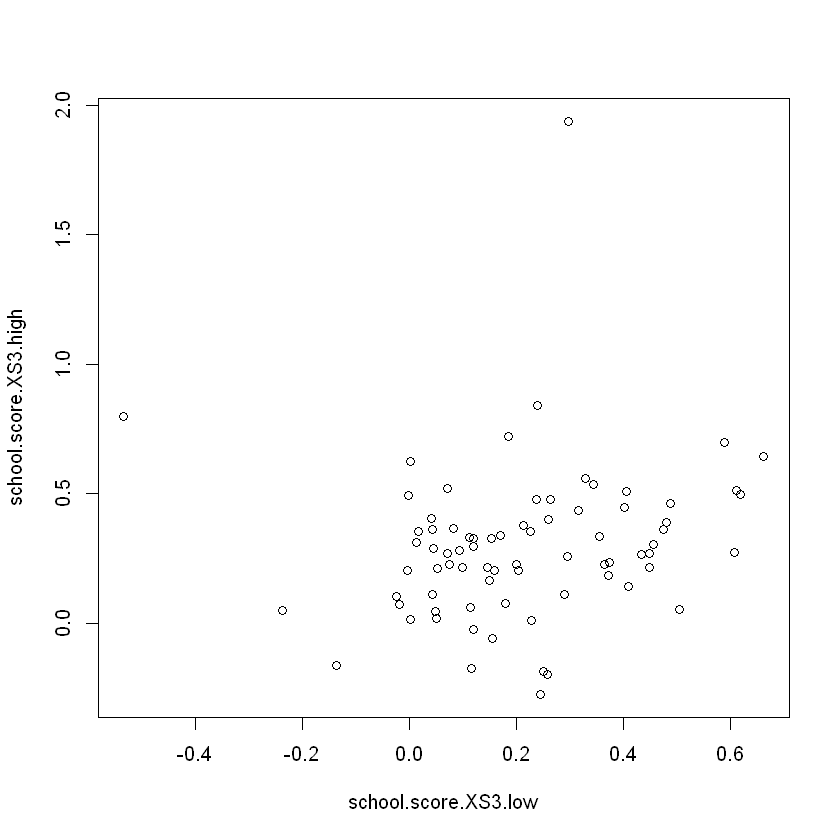

In [4]:
#
# Omnibus tests for heterogeneity
#

# Run best linear predictor analysis
test_calibration(cf)

# Compare regions with high and low estimated CATEs
high_effect = tau.hat > median(tau.hat)
ate.high = average_treatment_effect(cf, subset = high_effect)
ate.low = average_treatment_effect(cf, subset = !high_effect)
paste("95% CI for difference in ATE:",
      round(ate.high[1] - ate.low[1], 3), "+/-",
      round(qnorm(0.975) * sqrt(ate.high[2]^2 + ate.low[2]^2), 3))


#
# formal test for X1 and X2
#

dr.score = tau.hat + W / cf$W.hat *
  (Y - cf$Y.hat - (1 - cf$W.hat) * tau.hat) -
  (1 - W) / (1 - cf$W.hat) * (Y - cf$Y.hat + cf$W.hat * tau.hat)
school.score = t(school.mat) %*% dr.score / school.size

school.X1 = t(school.mat) %*% X$X1 / school.size
high.X1 = school.X1 > median(school.X1)
t.test(school.score[high.X1], school.score[!high.X1])

school.X2 = (t(school.mat) %*% X$X2) / school.size
high.X2 = school.X2 > median(school.X2)
t.test(school.score[high.X2], school.score[!high.X2])

school.X2.levels = cut(school.X2,
                       breaks = c(-Inf, quantile(school.X2, c(1/3, 2/3)), Inf))
summary(aov(school.score ~ school.X2.levels))

#
# formal test for S3
#

school.score.XS3.high = t(school.mat) %*% (dr.score * (X$S3 >= 6)) /
  t(school.mat) %*% (X$S3 >= 6)
school.score.XS3.low = t(school.mat) %*% (dr.score * (X$S3 < 6)) /
  t(school.mat) %*% (X$S3 < 6)

plot(school.score.XS3.low, school.score.XS3.high)
t.test(school.score.XS3.high - school.score.XS3.low)

In this part, multiple test are done in order to find the best fit model.
The results indicate that the mean forest predictions are a significant predictor of the treatment effect, no significant difference in the Average Treatment Effect (ATE) between regions as the difference is 0.054 with a 95% confidence interval of ± 0.07. For the predictor X1, there is a significant difference in school scores between high and low levels. X2 does not show a significant difference in school scores between high and low levels. An ANOVA test for different levels of X2 also shows no significant differences in school scores

### 4.Look at school-wise heterogeneity

[1] "0.247 +/- 0.039"


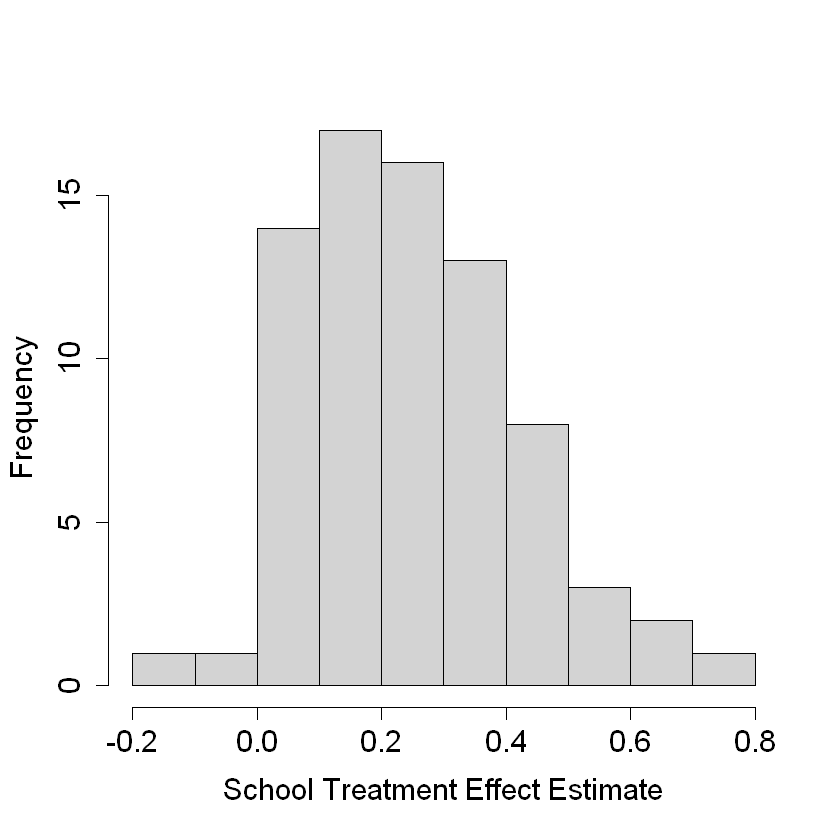

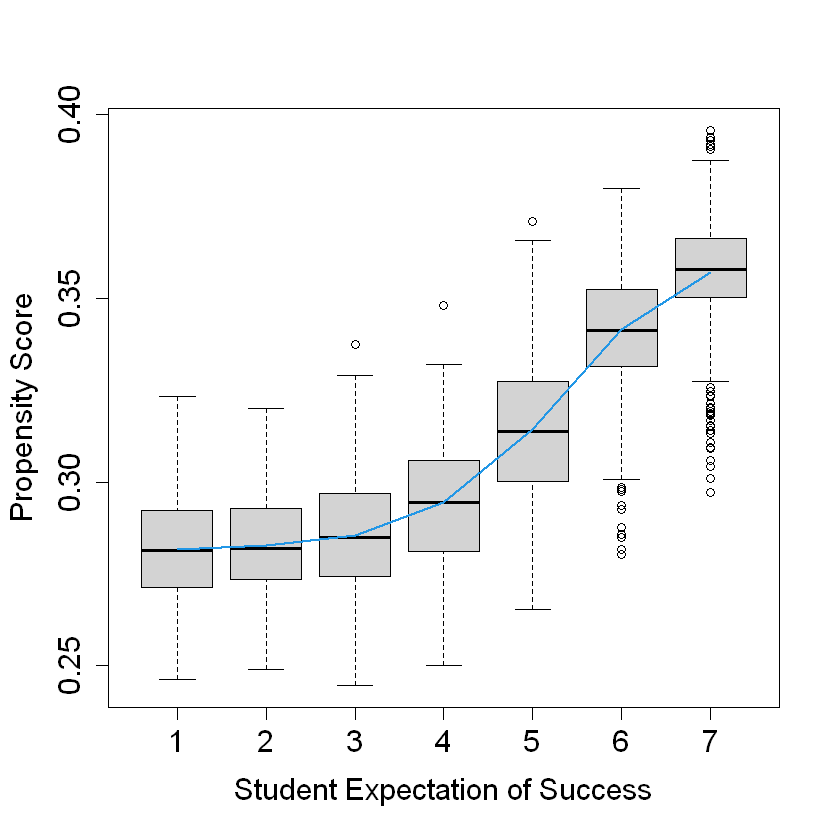

In [5]:
# Look at school-wise heterogeneity

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(school.score, xlab = "School Treatment Effect Estimate", main = "")

# Re-check ATE... sanity check only

ate.hat = mean(school.score)
se.hat = sqrt(var(school.score) / length(school.score - 1))
print(paste(round(ate.hat, 3), "+/-", round(1.96 * se.hat, 3)))

# Look at variation in propensity scores

DF = X
DF$W.hat = cf$W.hat

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(W.hat ~ S3, data = DF, ylab = "Propensity Score", xlab = "Student Expectation of Success")
lines(smooth.spline(X$S3, cf$W.hat), lwd = 2, col = 4)

We can see that the distribution of school.score isnt normal and has a strong bias. After that, the student expectation of success is expected (with the cf) to positively affect the propensity score, but we see that there are many values that do not adjust (more in 6 and 7).

### 5. Analysis ignoring clusters. How do the results change?

[1] "95% CI for the ATE: 0.253 +/- 0.022"


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value    Pr(>t)    
mean.forest.prediction         1.013241   0.045224  22.405 < 2.2e-16 ***
differential.forest.prediction 0.523158   0.123531   4.235 1.152e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5



Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value Pr(>t)    
mean.forest.prediction         0.988922   0.065178 15.1727 <2e-16 ***
differential.forest.prediction 0.187433   0.207553  0.9031 0.1833    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] 6.542964e-05 6.937259e-04

                     Df Sum Sq Mean Sq F value   Pr(>F)    
factor(school.id)    75    200   2.673   1.989 8.85e-07 ***
Residuals         10315  13861   1.344                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

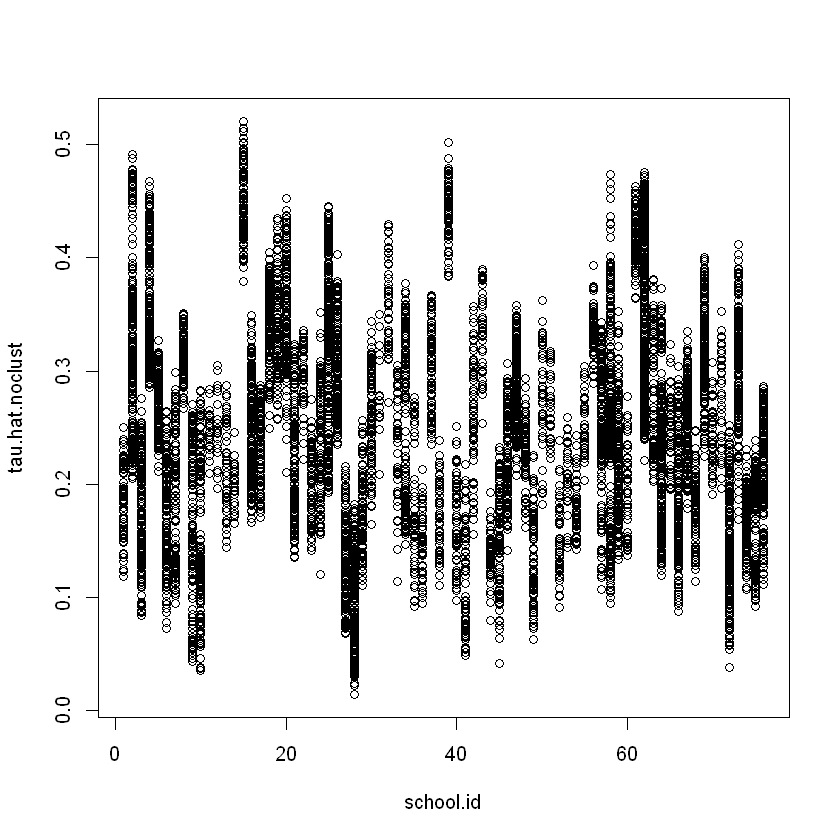

In [9]:
#
# Analysis ignoring clusters
#

cf.noclust = causal_forest(X[,selected.idx], Y, W,
                           Y.hat = Y.hat, W.hat = W.hat,
                           tune.parameters = "all")

ATE.noclust = average_treatment_effect(cf.noclust)
paste("95% CI for the ATE:", round(ATE.noclust[1], 3),
      "+/-", round(qnorm(0.975) * ATE.noclust[2], 3))

test_calibration(cf.noclust)

tau.hat.noclust = predict(cf.noclust)$predict
plot(school.id, tau.hat.noclust)

nfold = 5
school.levels = unique(school.id)
cluster.folds = sample.int(nfold, length(school.levels), replace = TRUE)

tau.hat.crossfold = rep(NA, length(Y))
for (foldid in 1:nfold) {
  print(foldid)
  infold = school.id %in% school.levels[cluster.folds == foldid]
  cf.fold = causal_forest(X[!infold, selected.idx], Y[!infold], W[!infold],
                          Y.hat = Y.hat[!infold], W.hat = W.hat[!infold],
                          tune.parameters = "all")
  pred.fold = predict(cf.fold, X[infold, selected.idx])$predictions
  tau.hat.crossfold[infold] = pred.fold
}

cf.noclust.cpy = cf.noclust
cf.noclust.cpy$predictions = tau.hat.crossfold
cf.noclust.cpy$clusters = school.id
test_calibration(cf.noclust.cpy)

Rloss = mean(((Y - Y.hat) - tau.hat * (W - W.hat))^2)
Rloss.noclust = mean(((Y - Y.hat) - tau.hat.noclust * (W - W.hat))^2)
Rloss.crossfold = mean(((Y - Y.hat) - tau.hat.crossfold * (W - W.hat))^2)

c(Rloss.noclust - Rloss, Rloss.crossfold - Rloss)

summary(aov(dr.score ~ factor(school.id)))


ATE goes from 0.247 +/- 0.039' to 0.253 +/- 0.022, reducing the confidence interval signicantly.

### 6. Analysis without fitting the propensity score

[1] "95% CI for the ATE: 0.254 +/- 0.039"

null device 
          1


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value Pr(>t)    
mean.forest.prediction         1.005143   0.082815 12.1373 <2e-16 ***
differential.forest.prediction 0.722757   0.657557  1.0992 0.1376    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.2433855  0.0771666  3.1540 0.002424 **
X1          -0.0495439  0.0291700 -1.6985 0.094132 . 
X2           0.0127040  0.0337703  0.3762 0.707984   
X3           0.0093747  0.0264377  0.3546 0.724023   
X4           0.0222932  0.0256041  0.8707 0.387080   
X5          -0.0342604  0.0268506 -1.2760 0.206440   
XC.1        -0.0030273  0.0930189 -0.0325 0.974136   
XC.2         0.0839073  0.1051560  0.7979 0.427772   
XC.3        -0.1351282  0.0878695 -1.5378 0.128871   
XC.4         0.0398784  0.0820527  0.4860 0.628570   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


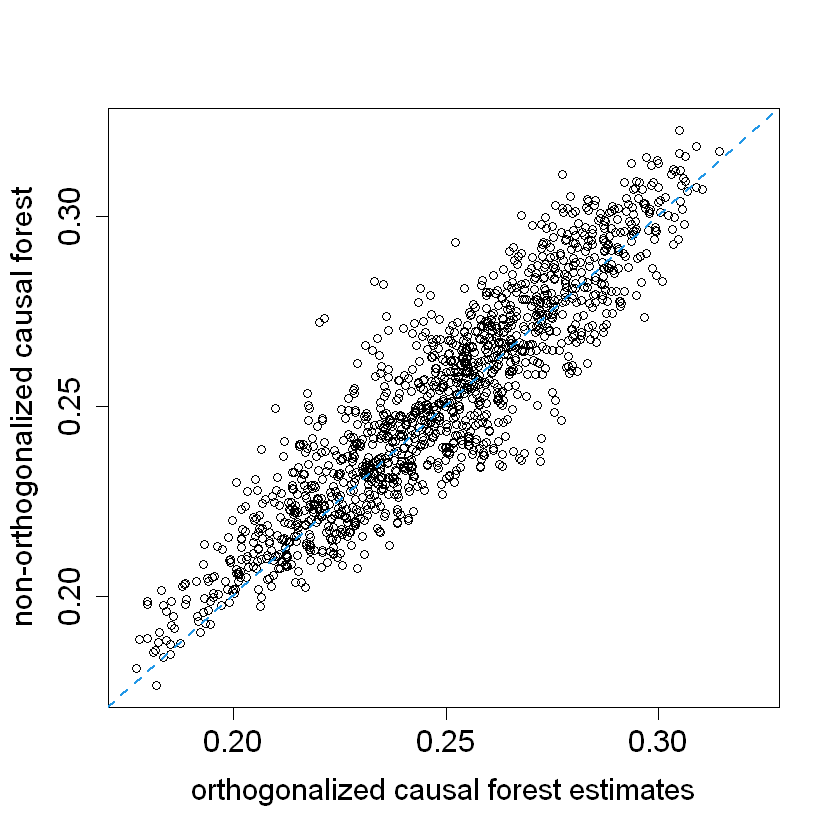

In [7]:
#
# Analaysis without fitting the propensity score
#

cf.noprop = causal_forest(X[,selected.idx], Y, W,
                          Y.hat = Y.hat, W.hat = mean(W),
                          tune.parameters = "all",
                          equalize.cluster.weights = TRUE,
                          clusters = school.id)
tau.hat.noprop = predict(cf.noprop)$predictions

ATE.noprop = average_treatment_effect(cf.noprop)
paste("95% CI for the ATE:", round(ATE.noprop[1], 3),
      "+/-", round(qnorm(0.975) * ATE.noprop[2], 3))

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
plot(tau.hat, tau.hat.noprop,
     xlim = range(tau.hat, tau.hat.noprop),
     ylim = range(tau.hat, tau.hat.noprop),
     xlab = "orthogonalized causal forest estimates",
     ylab = "non-orthogonalized causal forest")
abline(0, 1, lwd = 2, lty = 2, col = 4)
par = pardef
dev.off()

#
# Train forest on school-wise DR scores
#

school.X = (t(school.mat) %*% as.matrix(X[,c(4:8, 25:28)])) / school.size
school.X = data.frame(school.X)
colnames(school.X) = c("X1", "X2", "X3", "X4", "X5",
                       "XC.1", "XC.2", "XC.3", "XC.4")

dr.score = tau.hat + W / cf$W.hat * (Y - cf$Y.hat - (1 - cf$W.hat) * tau.hat) -
  (1 - W) / (1 - cf$W.hat) * (Y - cf$Y.hat + cf$W.hat * tau.hat)
school.score = t(school.mat) %*% dr.score / school.size

school.forest = regression_forest(school.X, school.score)
school.pred = predict(school.forest)$predictions
test_calibration(school.forest)


# Alternative OLS analysis
school.DF = data.frame(school.X, school.score=school.score)
coeftest(lm(school.score ~ ., data = school.DF), vcov = vcovHC)


### 7. The code plot six plots in the Make some plots section, so explain what you find there.

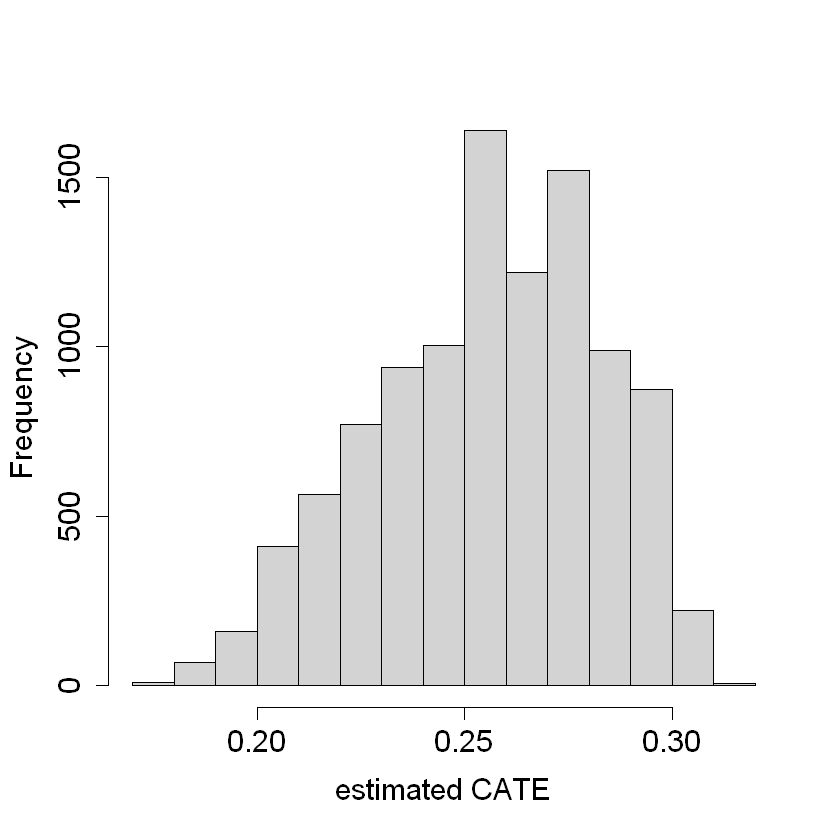

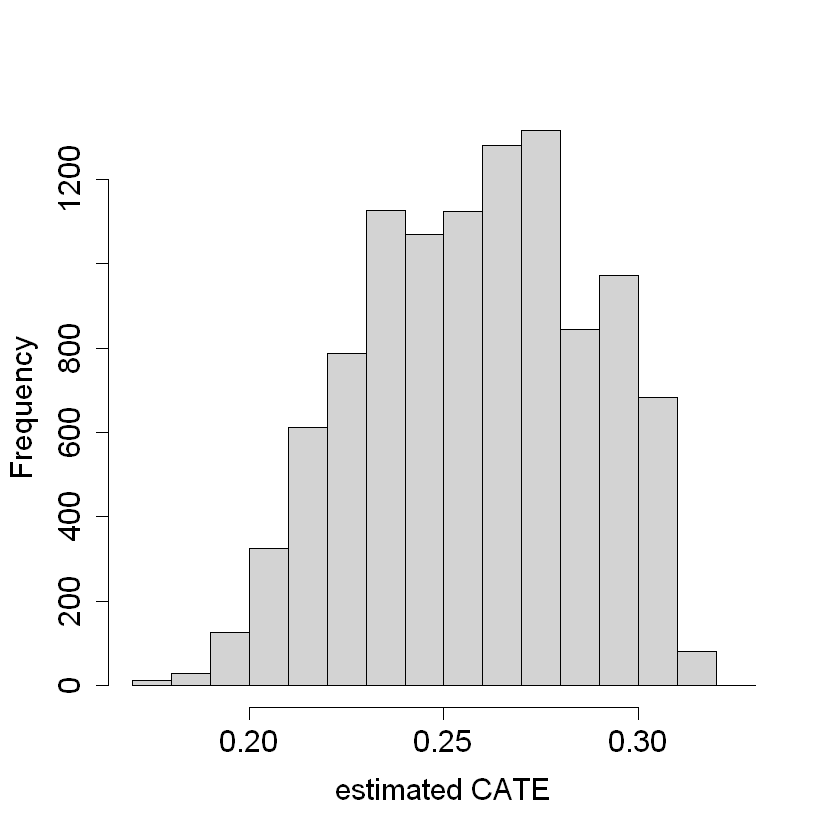

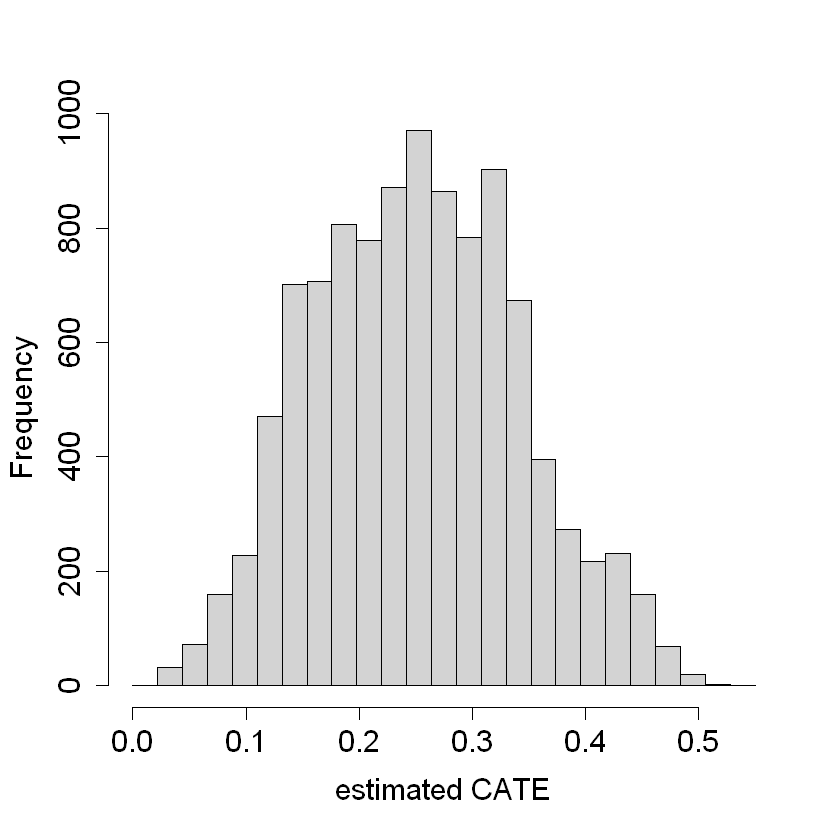

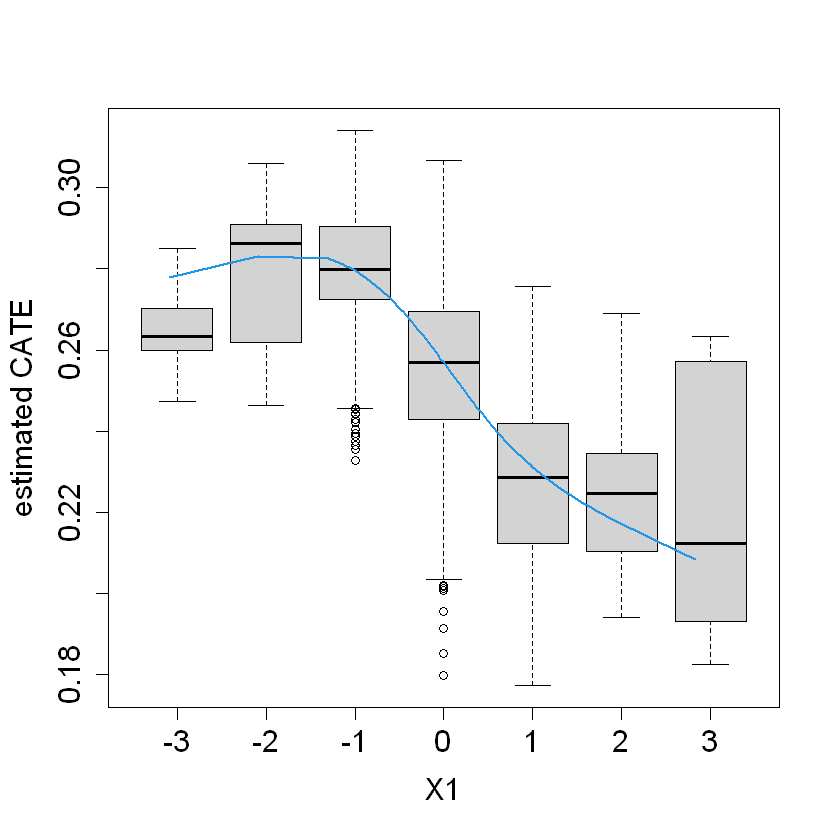

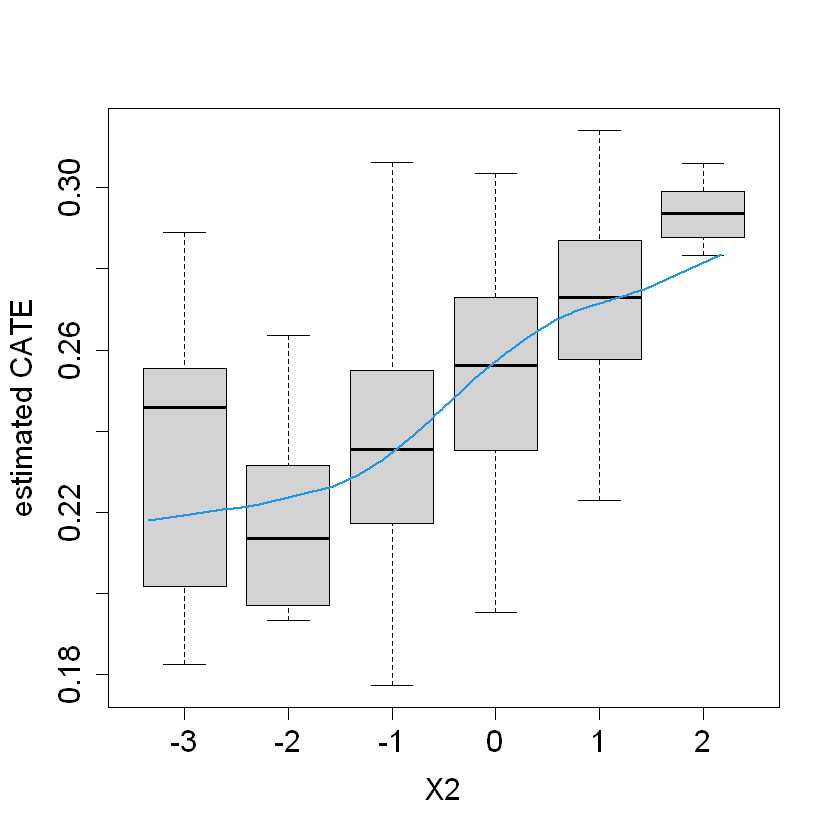

[1] "95% CI for the ATE: -0.005 +/- 0.146"

[1] "95% CI for the ATE: 0.114 +/- 0.138"

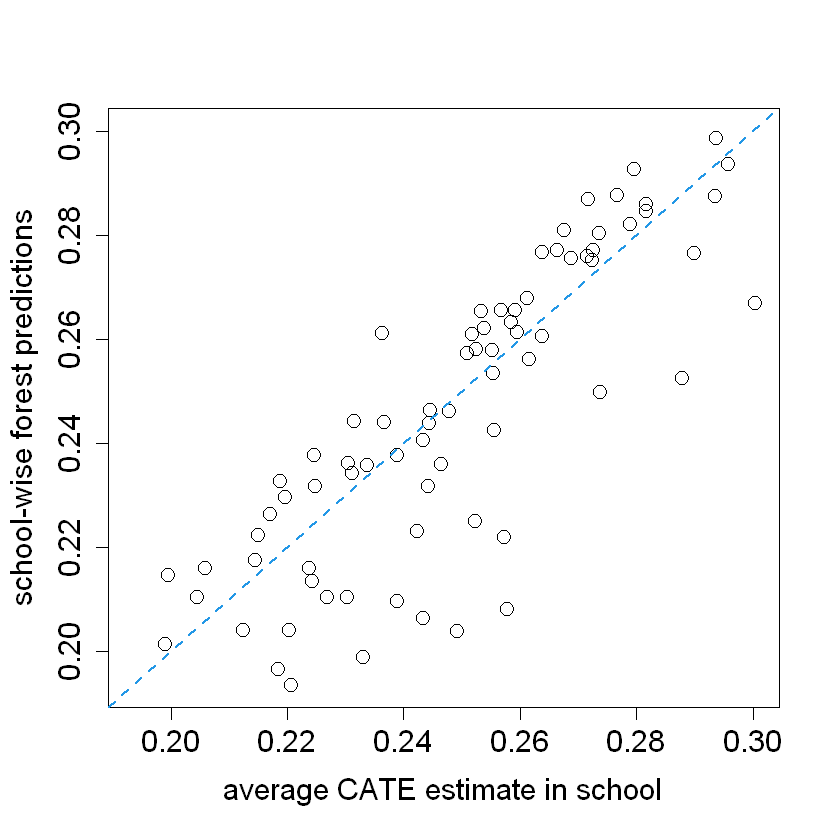

In [10]:
# Make some plots...
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(tau.hat, xlab = "estimated CATE", main = "")

hist(tau.hat.noprop, xlab = "estimated CATE", main = "")

hist(tau.hat.noclust, xlab = "estimated CATE", main = "", breaks = seq(-0.0, 0.55, by = 0.55 / 25))

boxplot(tau.hat ~ round(X$X1), xlab = "X1", ylab = "estimated CATE")
lines(smooth.spline(4 + X[,"X1"], tau.hat, df = 4), lwd = 2, col = 4)

boxplot(tau.hat ~ round(X$X2), xlab = "X2", ylab = "estimated CATE")
lines(smooth.spline(4 + X[,"X2"], tau.hat, df = 4), lwd = 2, col = 4)

school.avg.tauhat = t(school.mat) %*% tau.hat / school.size

plot(school.avg.tauhat, school.pred, cex = 1.5, xlim = range(school.avg.tauhat, school.pred),
     ylim = range(school.avg.tauhat, school.pred), xlab = "average CATE estimate in school",
     ylab = "school-wise forest predictions")
abline(0, 1, lwd = 2, lty = 2, col = 4)

#
# Experiment with no orthogonalization
#

n.synth = 1000
p.synth = 10
X.synth = matrix(rnorm(n.synth * p.synth), n.synth, p.synth)
W.synth = rbinom(n.synth, 1, 1 / (1 + exp(-X.synth[,1])))
Y.synth = 2 * rowMeans(X.synth[,1:6]) + rnorm(n.synth)

Y.forest.synth = regression_forest(X.synth, Y.synth)
Y.hat.synth = predict(Y.forest.synth)$predictions
W.forest.synth = regression_forest(X.synth, W.synth)
W.hat.synth = predict(W.forest.synth)$predictions

cf.synth = causal_forest(X.synth, Y.synth, W.synth,
                         Y.hat = Y.hat.synth, W.hat = W.hat.synth)
ATE.synth = average_treatment_effect(cf.synth)
paste("95% CI for the ATE:", round(ATE.synth[1], 3),
      "+/-", round(qnorm(0.975) * ATE.synth[2], 3))

cf.synth.noprop = causal_forest(X.synth, Y.synth, W.synth,
                                Y.hat = Y.hat.synth, W.hat = mean(W.synth))
ATE.synth.noprop = average_treatment_effect(cf.synth.noprop)
paste("95% CI for the ATE:", round(ATE.synth.noprop[1], 3),
      "+/-", round(qnorm(0.975) * ATE.synth.noprop[2], 3))



The first two estimated CATE have less variance than the no-propensity score one. X1 and X2 show good fits, but x1 has more atypical values.

### 8. Visualize school-level covariates by treatment heterogeneity

[1] 0.2105263

[1] 0.5384615

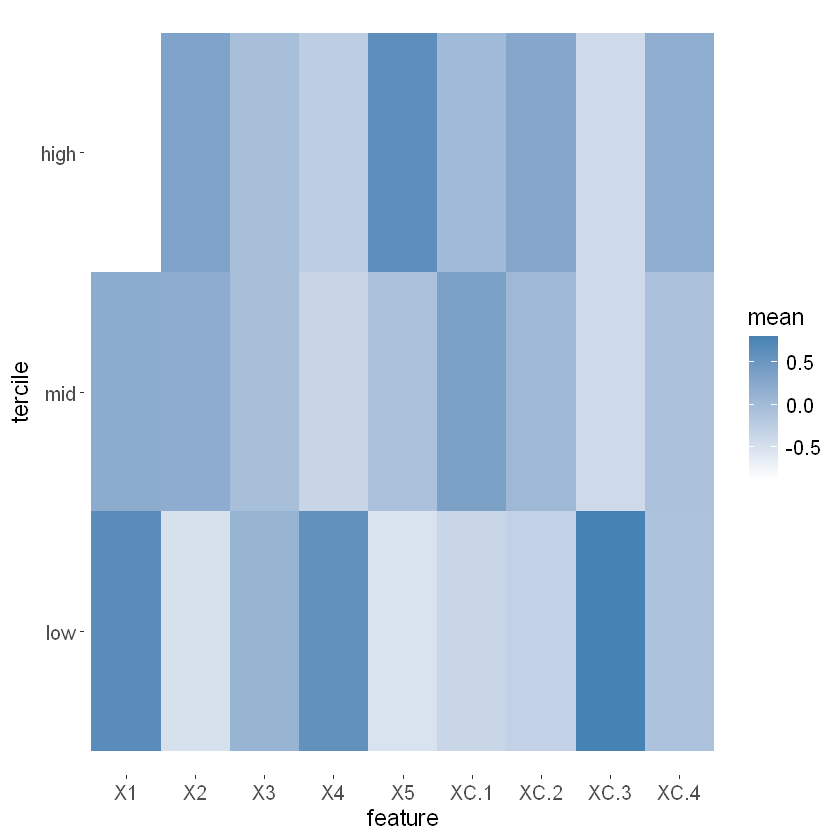

In [8]:
#
# Visualize school-level covariates by treatment heterogeneity
#

school.X.std = scale(school.X)
school.tercile = cut(school.pred,
                     breaks = c(-Inf, quantile(school.pred, c(1/3, 2/3)), Inf))
school.tercile.mat = model.matrix(~ school.tercile + 0)
school.means = diag(1 / colSums(school.tercile.mat)) %*% t(school.tercile.mat) %*% as.matrix(school.X.std)

MM = max(abs(school.means))
HC = heat.colors(21)
school.col = apply(school.means, 1:2, function(aa) HC[1 + round(20 * (0.5 + aa))])

DF.plot = data.frame(tercile=rep(factor(1:3, labels=c("low", "mid", "high")), 9), mean=as.numeric(school.means),
                     feature = factor(rbind(colnames(school.X), colnames(school.X), colnames(school.X))))

ggplot(data = DF.plot, aes(x = feature, y = tercile, fill = mean)) +
    geom_tile() + scale_fill_gradient(low = "white", high = "steelblue") +
    theme(axis.text = element_text(size=12), axis.title = element_text(size=14),
          legend.title = element_text(size=14), legend.text = element_text(size=12)) +
    theme(panel.background = element_blank())
ggsave("tercile_plot.pdf", width = 8, height = 4.5, dpi = 120)

mean(school.X$XC.3)
mean(school.X$XC.3[as.numeric(school.tercile) == 1])


Low X2, high X5 and low XC.3 show the biggest means. On the other hand, low X2, low X5 and high-mid show the lowest ones.

### 9. CATE by school

null device 
          1

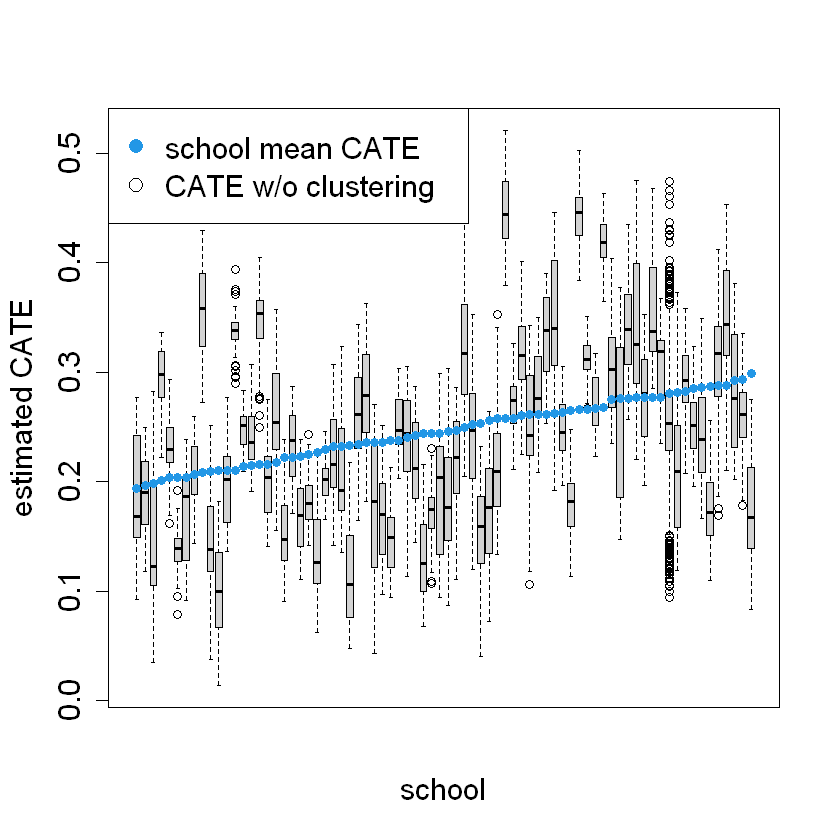

In [11]:
#
# CATE by school
#

ord = order(order(school.pred))
school.sort = ord[school.id]

#pdf("school_boxplot.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat.noclust ~ school.sort, xaxt = "n",
        xlab = "school", ylab = "estimated CATE")
points(1:76, sort(school.pred), col = 4, pch = 16)
legend("topleft", c("school mean CATE", "CATE w/o clustering"), pch = c(16, 1), col = c(4, 1), cex = 1.5)
par = pardef
dev.off()

Most of the schools show low difference from the mean, but there are many extreme values at the right of the graph.